In [ ]:
# Análise de Dados do IBC-Br (2009-2011)
# Este projeto foi desenvolvido como atividade da Pós-Graduação da Unicarioca
# nas disciplinas de Linguagem de Programação Aplicada R e Fundamentos de Estatística Aplicada,
# ministradas pelos professores Sérgio Monteiro e Manuel Martins.

# Grupo
# Mateus Silva: LinkedIn (https://www.linkedin.com/in/mateus-magalhaes) | GitHub (https://github.com/tecmateus)
# Tiago Lopes: LinkedIn (https://www.linkedin.com/in/tiago-lopes) | GitHub (https://github.com/TiagLopes)
# Gabriel Rios: LinkedIn (https://www.linkedin.com/in/gabriel-rios) | GitHub (https://github.com/riosgabriel95)
# Vinícius Ferreira: LinkedIn (https://www.linkedin.com/in/vfdo) | GitHub (https://github.com/vfoliveiras)
# Link da apresentação de slide (https://unicarioca-my.sharepoint.com/:p:/g/personal/2014103280_aluno_unicarioca_edu_br/ESOpU2DKtIBDoTsdjoxWQLUBTq1OwDTpRRjRD_rR_VVedw?e=SXU8OY)

In [45]:
install.packages("zoo")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [55]:
install.packages("lubridate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
install.packages("knitr") # Instalação do pacote "knitr"
install.packages("kableExtra") # Instalação do pacote "kableExtra"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’




In [2]:
install.packages("WDI") # Instalação  da biblioteca World Bank

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
# Carregamento de Pacotes
library(readr)       # Para leitura de arquivos de dados, como arquivos CSV e TXT.
library(WDI)         # Para acessar dados do World Bank.
library(dplyr)       # Para manipulação de dados, incluindo filtragem, agrupamento, seleção e transformação de variáveis.
library(knitr)       # Para criação de relatórios dinâmicos em R.
library(kableExtra)  # Para formatação de tabelas em relatórios criados com o knitr.
library(ggplot2)     # Para criação de gráficos e visualização de dados.
library(scales)      # Para formatação de escalas nos gráficos.
library(magrittr)    # Para utilização do operador pipe (%>%).
library(broom)       # Para organização de resultados de modelos estatísticos em dataframes.
library(stats)       # Para funções estatísticas básicas.
library(zoo)
library(lubridate)




Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [8]:
# Definição da URL do arquivo limitando-se as datas de 01/01/2008 até 31/12/2011(Pegamos deste 2008 para podermos ter o histórico)
url <- "https://api.bcb.gov.br/dados/serie/bcdata.sgs.24363/dados?formato=csv&dataInicial=01/01/2008&dataFinal=31/12/2011"


In [9]:
# Importação do arquivo CSV como data frame
df <- read.csv(url, sep = ";", dec = ".", header = TRUE, stringsAsFactors = FALSE)

In [10]:
# Visibilidade das primeiras linhas do data frame
head(df)

,data,valor
,<chr>,<chr>
1,01/01/2008,"121,86"
2,01/02/2008,"121,91"
3,01/03/2008,"128,99"
4,01/04/2008,"129,48"
5,01/05/2008,"128,92"
6,01/06/2008,"130,59"


In [11]:
# Definir os parâmetros para a busca dos dados do PIB
country <- "BR"  # Código do país (BR para Brasil)
indicator <- "NY.GDP.MKTP.CD"  # Código do indicador (PIB atual em dólares americanos)
start_year <- 2009
end_year <- 2011



In [12]:
# Extrair os dados do PIB brasileiro
pib_data <- WDI(country = country, indicator = indicator, start = start_year, end = end_year)

In [13]:
pib_data$NY.GDP.MKTP.CD <- format(pib_data$NY.GDP.MKTP.CD, scientific = FALSE, big.mark = ",", decimal.mark = ".", trim = TRUE)


In [14]:
pib_data <- pib_data %>%
  rename(País = country,
         Código_País = iso2c,
         Código_ISO3 = iso3c,
         Ano = year,
         PIB = NY.GDP.MKTP.CD)

In [15]:
pib_data$Ano <- as.character(pib_data$Ano)

In [16]:
# Ordenar a tabela por Ano
pib_data <- pib_data %>%
  arrange(Ano)

In [17]:
# Visualizar os dados do PIB
kable(pib_data, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")

Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




|  País  | Código_País | Código_ISO3 | Ano  |        PIB        |
|:------:|:-----------:|:-----------:|:----:|:-----------------:|
| Brazil |     BR      |     BRA     | 2009 | 1,667,019,783,635 |
| Brazil |     BR      |     BRA     | 2010 | 2,208,871,646,203 |
| Brazil |     BR      |     BRA     | 2011 | 2,616,201,578,192 |

2. Faça:
a. Exiba um gráfico anual com os dados da séries temporais dos anos de 2009 a 2011;

In [18]:
# conversão coluna "data" para formato de data
df$data <- as.Date(df$data, format = "%d/%m/%Y")

# conversão coluna "Valor" para numérica
df$valor <- as.numeric(gsub(",", ".", df$valor))


In [19]:
# filtragem dos dados para incluir apenas anos de 2009 a 2011
df_ano <- subset(df, format(data, "%Y") %in% c("2009", "2010", "2011"))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


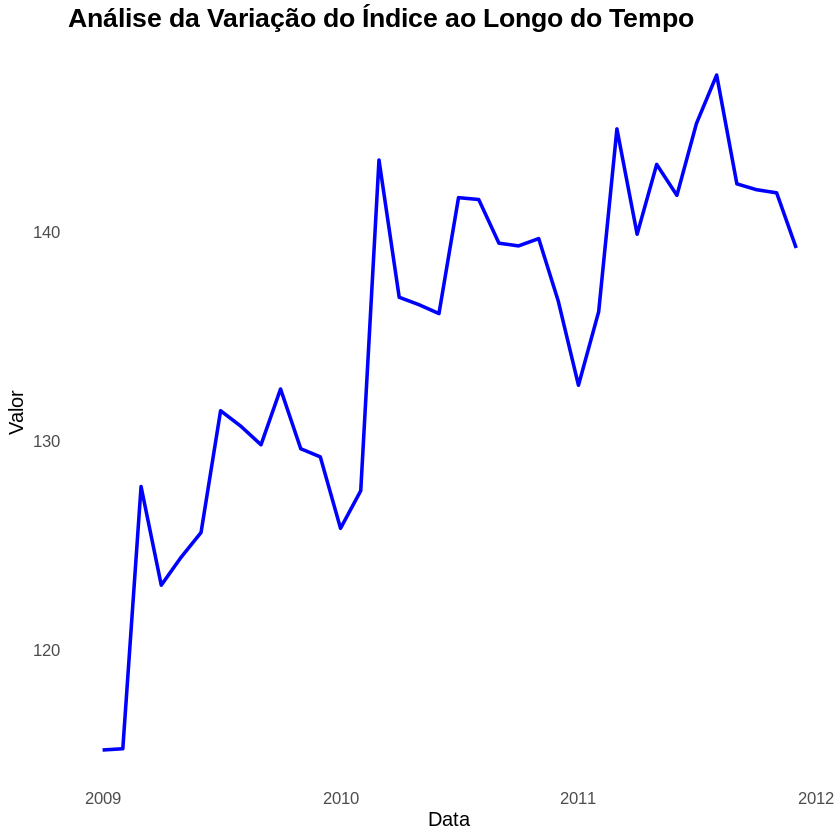

In [20]:
# Gráfico de linhas dos valores por data:

ggplot(df_ano, aes(x = data, y = valor)) +  # Define o dataframe e mapeia as variáveis x e y
  geom_line(color = "blue", size = 1) +  # Adiciona uma linha com cor azul e espessura de 1
  labs(title = "Análise da Variação do Índice ao Longo do Tempo", x = "Data", y = "Valor") +  # Define os títulos dos eixos e título do gráfico
  theme_minimal() +  # Aplica um tema minimalista ao gráfico
  theme(
    plot.title = element_text(size = 16, face = "bold"),  # Define o tamanho e estilo do título do gráfico
    axis.title = element_text(size = 12),  # Define o tamanho dos títulos dos eixos
    axis.text = element_text(size = 10),  # Define o tamanho dos rótulos dos eixos
    panel.grid.major = element_blank(),  # Remove as linhas de grade principais
    panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
    panel.border = element_blank(),  # Remove a borda do painel
    legend.position = "none"  # Remove a legenda
  )


b. Exiba um gráfico em barras por ano, sendo que cada barra deve ter “subbarras” mensais.

In [21]:
# Nova coluna com mês e ano
df_ano$mes_ano <- format(df_ano$data, "%m %Y")

In [22]:
# Ordenar os meses e anos
df_ano$mes_ano <- factor(df_ano$mes_ano, levels = unique(df_ano$mes_ano))


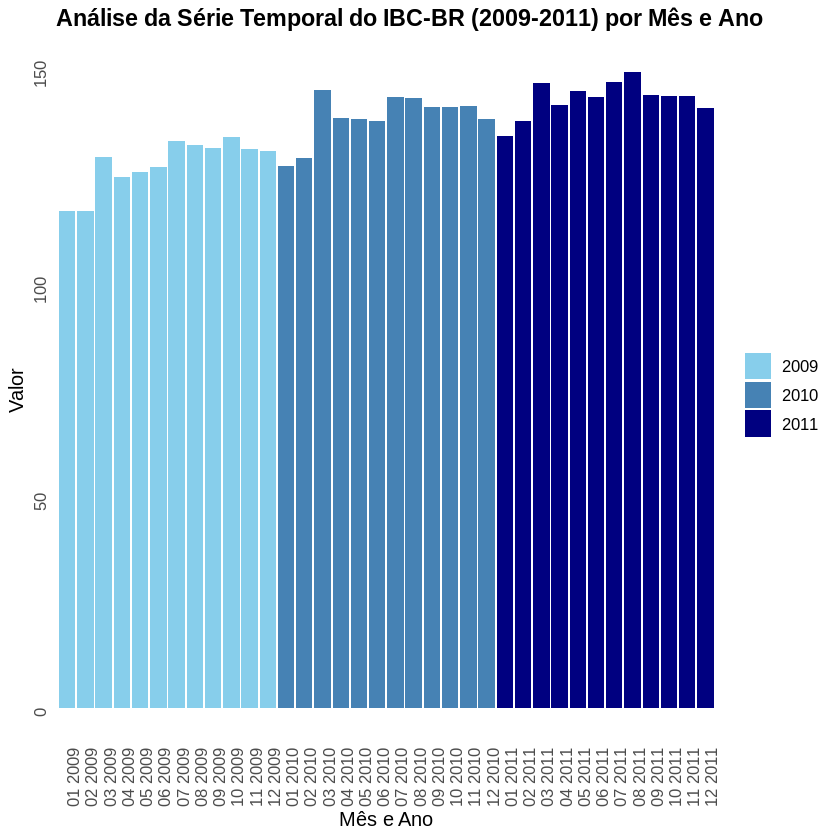

In [23]:
# Gráfico de barras por ano com subbarras mensais
ggplot(df_ano, aes(x = mes_ano, y = valor, fill = format(data, "%Y"))) +  # Define os dados e mapeia as variáveis para os eixos
  geom_col(position = "dodge") +  # Adiciona as barras colunares com posicionamento dodge (agrupadas por categoria)
  labs(title = "Análise da Série Temporal do IBC-BR (2009-2011) por Mês e Ano", x = "Mês e Ano", y = "Valor") +  # Define os títulos dos eixos e título do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 14, face = "bold"),  # Define a formatação do título do gráfico
        axis.title = element_text(size = 12),  # Define a formatação dos títulos dos eixos
        axis.text = element_text(size = 10, angle = 90, hjust = 1, vjust = 0.5),  # Define a formatação do texto dos eixos (ângulo, alinhamento horizontal e vertical)
        legend.title = element_blank(),  # Remove o título da legenda
        legend.text = element_text(size = 10),  # Define a formatação do texto da legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank()) +  # Remove a borda do painel
  scale_fill_manual(values = c("2009" = "skyblue", "2010" = "steelblue", "2011" = "navyblue"))  # Define as cores de preenchimento manualmente para cada ano



c.  Exiba um gráfico em barras lado a lado por mês, com os dados dos anos de 2009 a 2011.

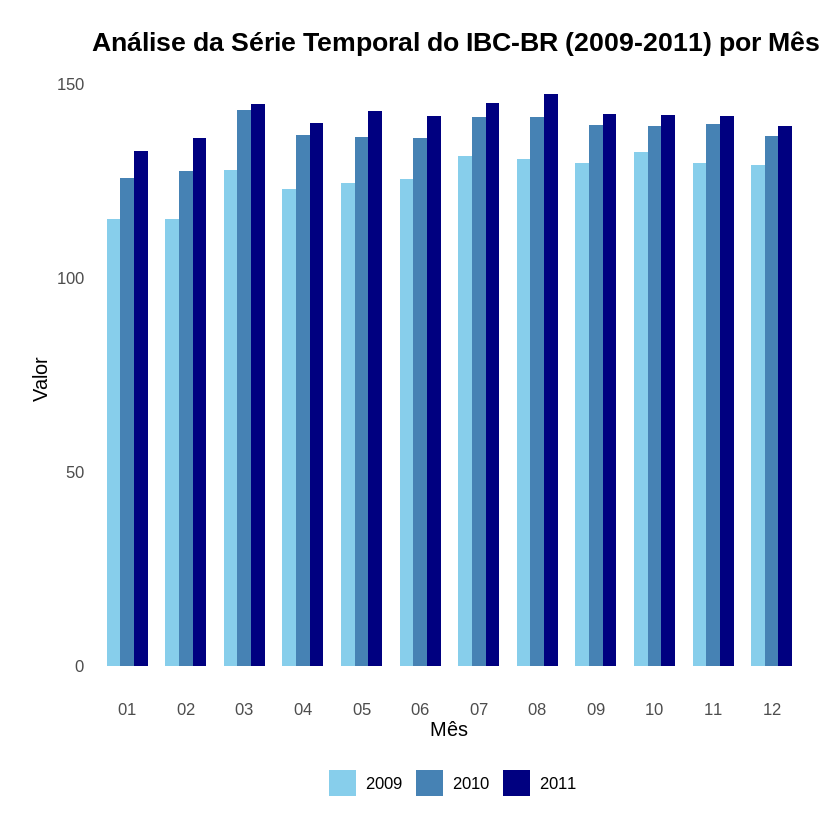

In [24]:
# Gráfico de barras lado a lado por mês
ggplot(df_ano, aes(x = format(data, "%m"), y = valor, fill = format(data, "%Y"))) +  # Define os dados e mapeia as variáveis para os eixos
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +  # Adiciona as barras com posicionamento lado a lado e largura de 0.7
  scale_fill_manual(values = c("2009" = "skyblue", "2010" = "steelblue", "2011" = "navyblue")) +  # Define as cores de preenchimento manualmente para cada ano
  labs(title = "Análise da Série Temporal do IBC-BR (2009-2011) por Mês", x = "Mês", y = "Valor") +  # Define os títulos dos eixos e título do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Define a formatação do título do gráfico
        axis.title = element_text(size = 12),  # Define a formatação dos títulos dos eixos
        axis.text = element_text(size = 10),  # Define a formatação do texto dos eixos
        legend.title = element_blank(),  # Remove o título da legenda
        legend.text = element_text(size = 10),  # Define a formatação do texto da legenda
        legend.position = "bottom",  # Posiciona a legenda na parte inferior do gráfico
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"))  # Define as margens do gráfico



Faça uma análise exploratória dos dados  (AED) anos de 2009 e 2011: por exemplo, mínimo, máximo, desvio-padrão, mediana, quartis e Outliers. Adicione outras informações relevantes.

In [25]:
# Calcular as estatísticas descritivas para cada ano
df_estatisticas <- df_ano %>% 
  group_by(Ano = format(data, "%Y")) %>%  # Agrupa os dados por ano, usando a função format() para extrair o ano da data
  summarize(
    Minimo = min(valor),  # Calcula o valor mínimo
    Q1 = quantile(valor, 0.25),  # Calcula o primeiro quartil
    Mediana = median(valor),  # Calcula a mediana
    Media = mean(valor),  # Calcula a média
    Q3 = quantile(valor, 0.75),  # Calcula o terceiro quartil
    Maximo = max(valor),  # Calcula o valor máximo
    DesvioPadrao = sd(valor),  # Calcula o desvio padrão
  ) %>% 
  distinct(Ano, .keep_all = TRUE)  # Mantém apenas as linhas únicas para cada ano



In [26]:
# Inclusão do PIB no df de estatísticas
df_estatisticas$PIB <- pib_data$PIB

In [98]:
# Visualizar o data frame com as estatísticas descritivas
kable(df_estatisticas, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")

Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




| Ano  | Minimo |    Q1    | Mediana |  Media   |    Q3    | Maximo | DesvioPadrao |        PIB        |
|:----:|:------:|:--------:|:-------:|:--------:|:--------:|:------:|:------------:|:-----------------:|
| 2009 | 115.20 | 124.0800 | 128.520 | 126.2217 | 130.0325 | 132.48 |   5.858558   | 1,667,019,783,635 |
| 2010 | 125.81 | 136.4125 | 138.100 | 137.0575 | 140.1475 | 143.44 |   5.367314   | 2,208,871,646,203 |
| 2011 | 132.66 | 139.7250 | 141.945 | 141.3967 | 143.6550 | 147.51 |   4.041474   | 2,616,201,578,192 |

In [28]:
# Calcular as estatísticas descritivas para cada mês
df_estatisticas_mes <- df %>%
  group_by(Mes = format(data, "%m")) %>%
  summarize(
    Minimo = min(valor),
    Q1 = quantile(valor, 0.25),
    Mediana = median(valor),
    Media = mean(valor),
    Q3 = quantile(valor, 0.75),
    Maximo = max(valor),
    DesvioPadrao = sd(valor),
  ) %>%
  distinct(Mes, .keep_all = TRUE)

In [29]:
# Visualizar o data frame com as estatísticas descritivas
kable(df_estatisticas_mes, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")

Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




| Mes | Minimo |    Q1    | Mediana |  Media   |    Q3    | Maximo | DesvioPadrao |
|:---:|:------:|:--------:|:-------:|:--------:|:--------:|:------:|:------------:|
| 01  | 115.20 | 120.1950 | 123.835 | 123.8825 | 127.5225 | 132.66 |   7.308353   |
| 02  | 115.26 | 120.2475 | 124.760 | 125.2400 | 129.7525 | 136.18 |   8.869231   |
| 03  | 127.81 | 128.6950 | 136.215 | 136.2925 | 143.8125 | 144.93 |   9.146447   |
| 04  | 123.09 | 127.8825 | 133.175 | 132.3325 | 137.6250 | 139.89 |   7.555688   |
| 05  | 124.41 | 127.7925 | 132.720 | 133.2700 | 138.1975 | 143.23 |   8.310359   |
| 06  | 125.61 | 129.3450 | 133.340 | 133.5100 | 137.5050 | 141.75 |   6.963964   |
| 07  | 131.44 | 135.2575 | 139.085 | 138.7000 | 142.5275 | 145.19 |   6.005003   |
| 08  | 130.70 | 133.0775 | 137.710 | 138.4075 | 143.0400 | 147.51 |   7.587825   |
| 09  | 129.81 | 131.9025 | 136.030 | 136.0425 | 140.1700 | 142.30 |   5.817516   |
| 10  | 132.48 | 132.7200 | 136.065 | 136.6575 | 140.0025 | 142.02 |   4.7

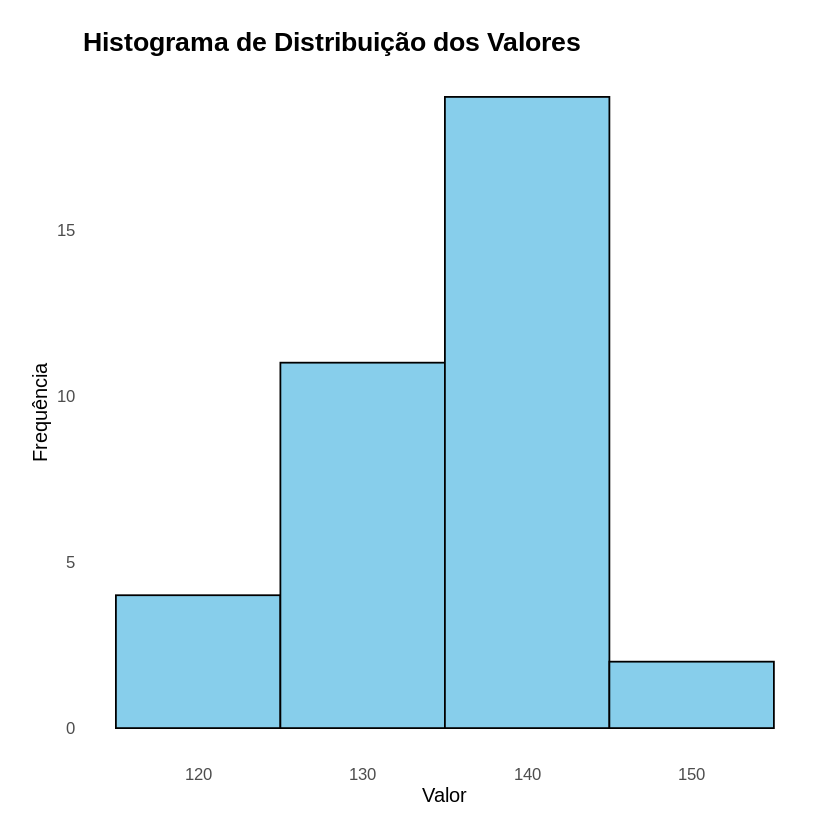

In [30]:
# Histograma dos valores
ggplot(df_ano, aes(x = valor)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black") +  # Cria o histograma com largura de intervalo de 10 unidades, preenchimento em azul céu e borda preta
  labs(title = "Histograma de Distribuição dos Valores", x = "Valor", y = "Frequência") +  # Define os títulos dos eixos x e y e o título do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "none",  # Remove a legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"))  # Define as margens do gráfico



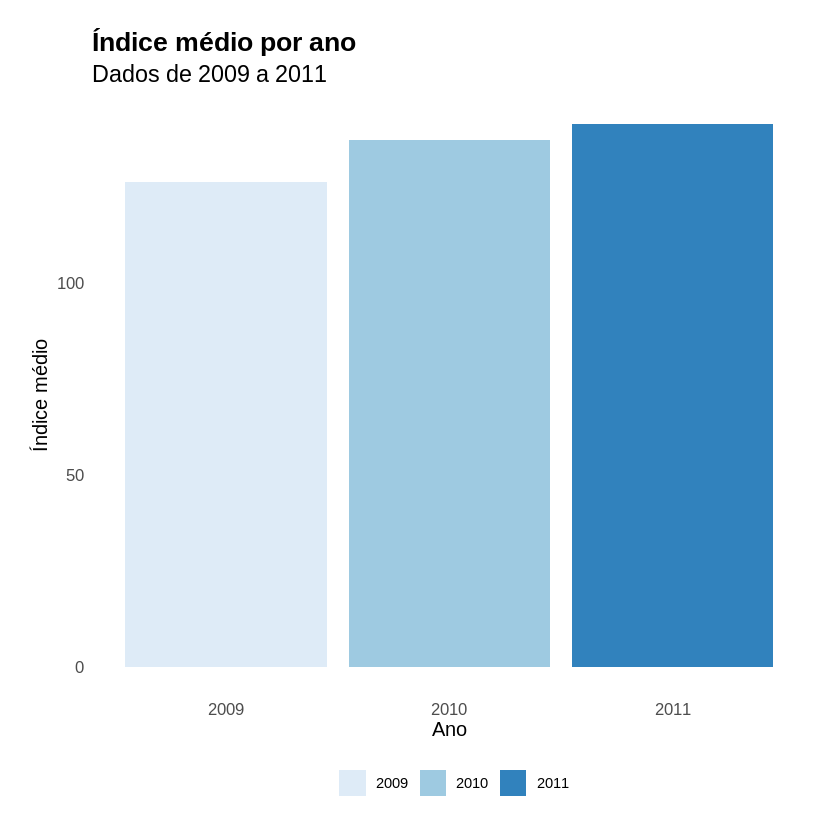

In [31]:
# Gráfico de barras da média dos valores por ano
df_ano %>% 
  group_by(ano = format(data, "%Y")) %>%  # Agrupa os dados por ano, convertendo a coluna de data para o formato de ano
  summarise(media_valor = mean(valor)) %>%  # Calcula a média dos valores para cada ano
  ggplot(aes(x = ano, y = media_valor, fill = ano)) +  # Define os dados a serem utilizados no gráfico e mapeia o preenchimento com base no ano
  geom_bar(stat = "identity", position = "dodge") +  # Cria o gráfico de barras com posição side-by-side (dodge)
  scale_fill_brewer(palette = "Blues") +  # Define a paleta de cores para preenchimento das barras
  labs(title = "Índice médio por ano",  # Define o título do gráfico
       subtitle = "Dados de 2009 a 2011",  # Define o subtítulo do gráfico
       x = "Ano",  # Define o rótulo do eixo x
       y = "Índice médio") +  # Define o rótulo do eixo y
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        plot.subtitle = element_text(size = 14),  # Formata o subtítulo do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "bottom",  # Posiciona a legenda na parte inferior do gráfico
        legend.title = element_blank(),  # Remove o título da legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"))  # Define as margens do gráfico



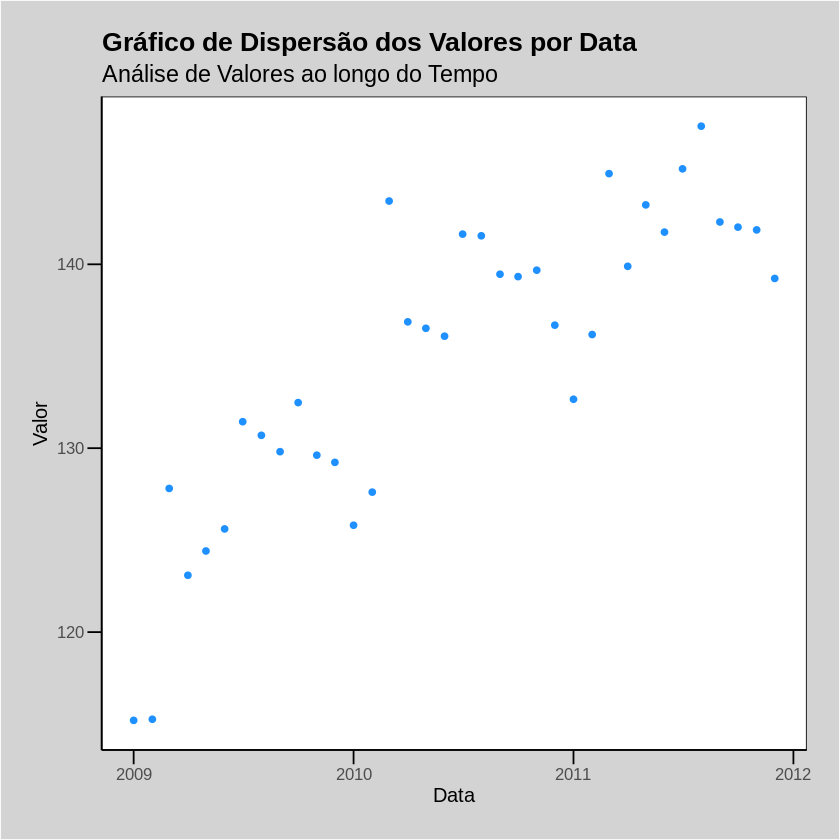

In [32]:
# Gráfico de dispersão dos valores por data
ggplot(df_ano, aes(x = data, y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_point(color = "dodgerblue") +  # Cria os pontos do gráfico com cor "dodgerblue"
  labs(title = "Gráfico de Dispersão dos Valores por Data",  # Define o título do gráfico
       subtitle = "Análise de Valores ao longo do Tempo",  # Define o subtítulo do gráfico
       x = "Data",  # Define o rótulo do eixo x
       y = "Valor") +  # Define o rótulo do eixo y
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        plot.subtitle = element_text(size = 14),  # Formata o subtítulo do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "none",  # Remove a legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"),  # Define as margens do gráfico
        plot.background = element_rect(fill = "lightgray", color = "white"),  # Define o fundo do gráfico
        panel.background = element_rect(fill = "white"),  # Define o fundo do painel
        panel.grid = element_line(color = "gray"),  # Define as linhas de grade do painel
        axis.line = element_line(color = "black"),  # Define a cor da linha dos eixos
        axis.ticks = element_line(color = "black"),  # Define a cor dos ticks dos eixos
        axis.ticks.length = unit(0.3, "cm"),  # Define o comprimento dos ticks dos eixos
        legend.background = element_rect(fill = "white"),  # Define o fundo da legenda
        legend.title = element_text(size = 12, face = "bold"),  # Formata o título da legenda
        legend.text = element_text(size = 10),  # Formata o texto da legenda
        legend.key = element_rect(color = "white"),  # Define a cor da caixa da legenda
        legend.key.size = unit(1.2, "lines"),  # Define o tamanho da caixa da legenda
        legend.key.width = unit(1.2, "lines"),  # Define a largura da caixa da legenda
        plot.caption = element_text(size = 10, hjust = 0))  # Formata o texto da legenda




In [33]:
# Identificação de valores ausentes
sum(is.na(df_ano$valor))


[1] 0

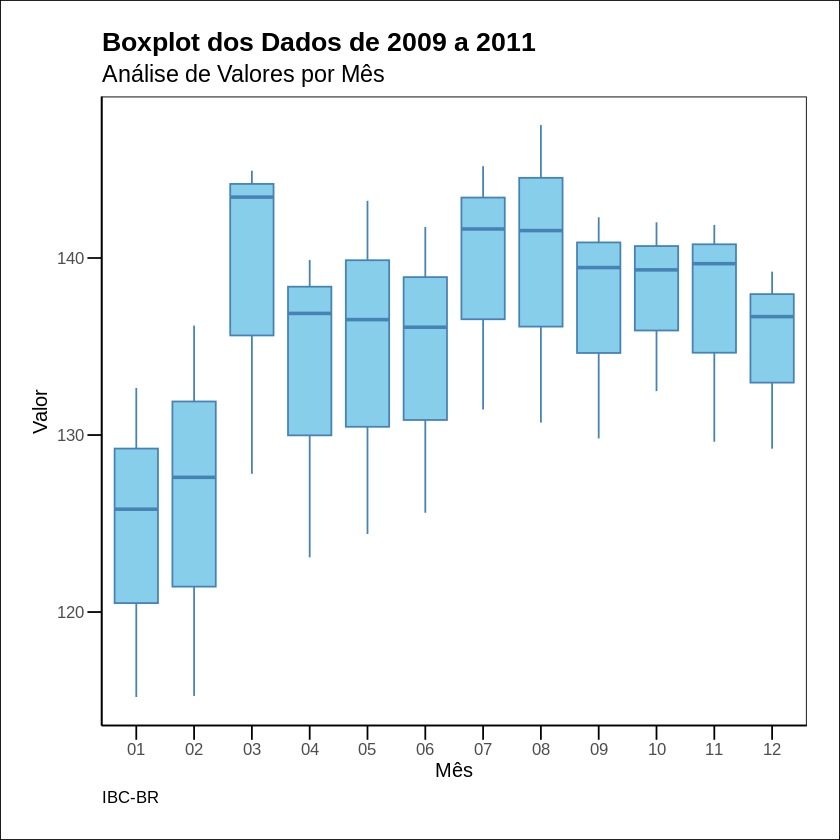

In [34]:
# Boxplot dos dados de 2009 a 2011
ggplot(data = df_ano, aes(x = format(data, "%m"), y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_boxplot(fill = "skyblue", color = "steelblue", outlier.color = "darkblue", outlier.shape = 16) +  # Cria o boxplot com as cores e formas definidas
  scale_x_discrete(name = "Mês") +  # Define a escala do eixo x como discreta e adiciona o rótulo "Mês"
  scale_y_continuous(name = "Valor") +  # Define a escala do eixo y como contínua e adiciona o rótulo "Valor"
  labs(title = "Boxplot dos Dados de 2009 a 2011",  # Define o título do gráfico
       subtitle = "Análise de Valores por Mês",  # Define o subtítulo do gráfico
       caption = "IBC-BR") +  # Define a legenda do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        plot.subtitle = element_text(size = 14),  # Formata o subtítulo do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "none",  # Remove a legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"),  # Define as margens do gráfico
        plot.background = element_rect(fill = "white"),  # Define o fundo do gráfico
        panel.background = element_rect(fill = "white"),  # Define o fundo do painel
        panel.grid = element_line(color = "gray"),  # Define as linhas de grade do painel
        axis.line = element_line(color = "black"),  # Define a cor da linha dos eixos
        axis.ticks = element_line(color = "black"),  # Define a cor dos ticks dos eixos
        axis.ticks.length = unit(0.3, "cm"),  # Define o comprimento dos ticks dos eixos
        legend.background = element_rect(fill = "white"),  # Define o fundo da legenda
        legend.title = element_text(size = 12, face = "bold"),  # Formata o título da legenda
        legend.text = element_text(size = 10),  # Formata o texto da legenda
        legend.key = element_rect(color = "white"),  # Define a cor da caixa da legenda
        legend.key.size = unit(1.2, "lines"),  # Define o tamanho da caixa da legenda
        legend.key.width = unit(1.2, "lines"),  # Define a largura da caixa da legenda
        plot.caption = element_text(size = 10, hjust = 0))  # Formata o texto da legenda


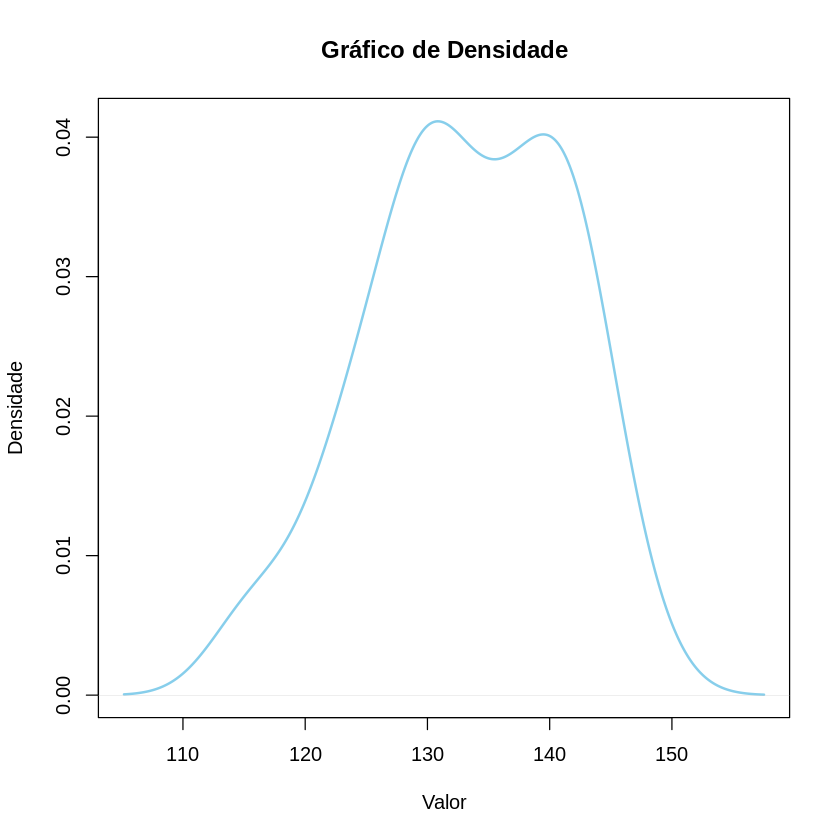

In [35]:
# Gráfico de densidade
plot(density(df$valor), col = "skyblue", lwd = 2, main = "Gráfico de Densidade", xlab = "Valor", ylab = "Densidade")


4. Calcule e exiba:
a.	Regressão linear dos dados dos anos 2010 e 2011

In [36]:
# Filtrar dados para incluir apenas anos de 2010 e 2011
df_ano_1011 <- subset(df_ano, format(data, "%Y") %in% c("2010", "2011"))

# Ajustar modelo de regressão linear
modelo <- lm(valor ~ data, data = df_ano_1011)

# Exibir resumo da regressão
summary(modelo)



Call:
lm(formula = valor ~ data, data = df_ano_1011)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4982 -1.9819  0.3448  2.3611  8.3003 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -71.610474  61.700689  -1.161  0.25824   
data          0.014094   0.004124   3.417  0.00247 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.254 on 22 degrees of freedom
Multiple R-squared:  0.3468,	Adjusted R-squared:  0.3171 
F-statistic: 11.68 on 1 and 22 DF,  p-value: 0.002466


`geom_smooth()` using formula = 'y ~ x'


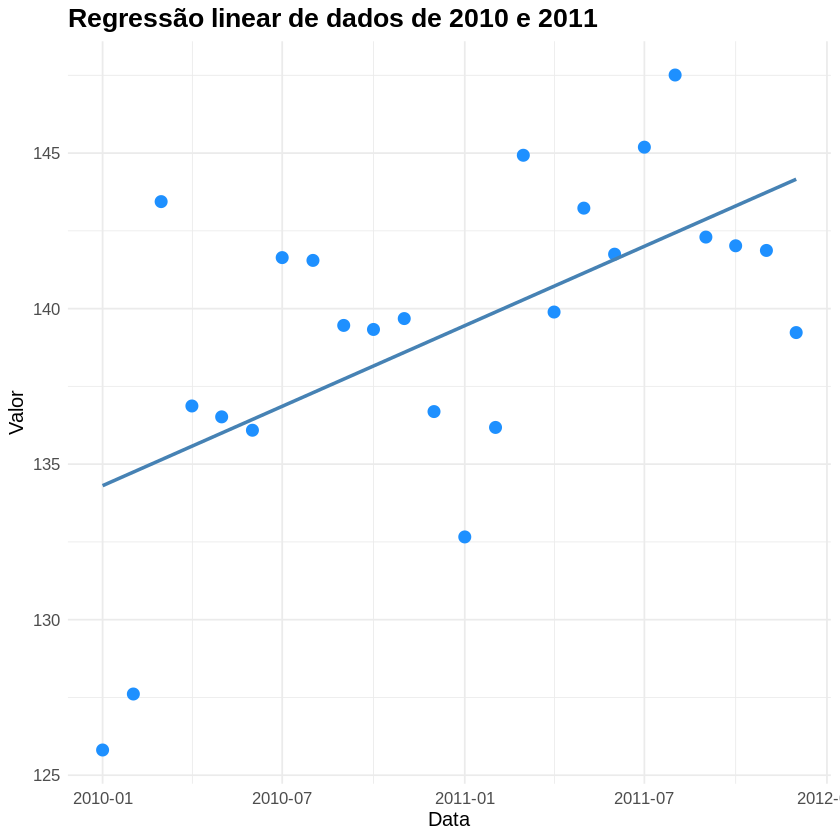

In [37]:
# Gráfico da regressão
ggplot(data = df_ano_1011, aes(x = data, y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_point(color = "dodgerblue", size = 3) +  # Adiciona pontos ao gráfico com cor e tamanho definidos
  geom_smooth(method = "lm", se = FALSE, color = "steelblue", linetype = "solid") +  # Adiciona uma linha de regressão linear ao gráfico com cor e tipo de linha definidos
  labs(title = "Regressão linear de dados de 2010 e 2011", x = "Data", y = "Valor") +  # Define o título e rótulos dos eixos do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10)) +  # Formata o texto dos eixos
  scale_color_manual(values = c("dodgerblue"))  # Define a cor dos pontos no gráfico




In [99]:
# Filtragem de dados para incluir apenas anos de 2010 e 2011
df_ano_1011 <- subset(df_ano, format(data, "%Y") %in% c("2010", "2011"))

# Ajuste do modelo de regressão polinomial de grau 2
modelo_poli <- lm(valor ~ poly(data, 2), data = df_ano_1011)

# Resumo do modelo utilizando a função tidy() do pacote broom
resumo <- tidy(modelo_poli)

# Visualizar o resumo
kable(resumo, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")




Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




|      term      |  estimate  | std.error | statistic  |  p.value  |
|:--------------:|:----------:|:---------:|:----------:|:---------:|
|  (Intercept)   | 139.227083 | 0.8434646 | 165.065706 | 0.0000000 |
| poly(data, 2)1 | 14.538469  | 4.1321159 |  3.518408  | 0.0020417 |
| poly(data, 2)2 | -6.292726  | 4.1321159 | -1.522882  | 0.1427057 |

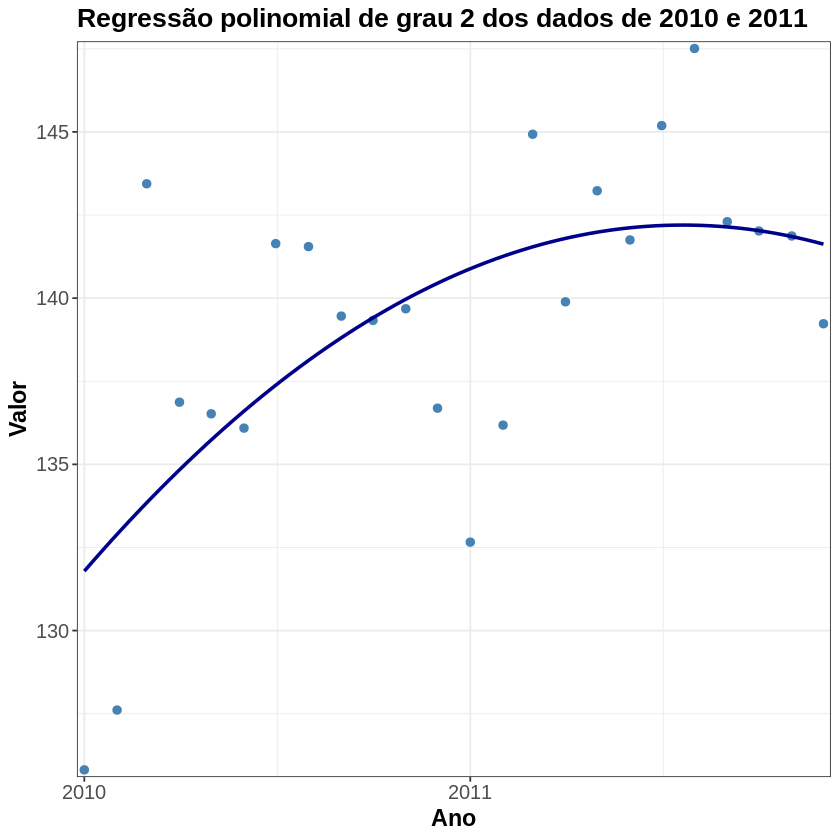

In [39]:
# plotagem do gráfico dos dados e curva de regressão polinomial
ggplot(df_ano_1011, aes(x = data, y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_point(color = "steelblue", size = 2) +  # Adiciona pontos ao gráfico com cor e tamanho definidos
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "darkblue", size = 1) +  # Adiciona uma curva de regressão polinomial de grau 2 ao gráfico com cor e espessura definidos
  scale_x_date(date_labels = "%Y", date_breaks = "1 year", expand = c(0.01, 0)) +  # Define a formatação do eixo x como datas com intervalo de 1 ano e expansão dos limites do eixo
  scale_y_continuous(name = "Valor", expand = c(0.01, 0)) +  # Define o título do eixo y e a expansão dos limites do eixo
  labs(title = "Regressão polinomial de grau 2 dos dados de 2010 e 2011", x = "Ano", y = "Valor") +  # Define o título e rótulos dos eixos do gráfico
  theme_bw() +  # Define o tema do gráfico como preto e branco
  theme(plot.title = element_text(face = "bold", size = 16),  # Formata o título do gráfico
        axis.title = element_text(face = "bold", size = 14),  # Formata os títulos dos eixos
        axis.text = element_text(size = 12),  # Formata o texto dos eixos
        legend.position = "none")  # Remove a legenda do gráfico


Adicional: Outras colunas

In [49]:
# Adição da coluna de taxa de crescimento e formatação como porcentagem
df <- df %>%
  mutate(taxa_crescimento = sprintf("%.2f%%", (valor / lag(valor) - 1) * 100))

In [50]:
# Adição da coluna de media movel
df$media_movel <- rollmean(df$valor, k = 12, align = "right", fill = NA)

In [51]:
# Adição da coluna de diferença entre o valor e a média móvel 
df$diferenca <- df$valor - df$media_movel

In [52]:
# Adição da coluna de variação percentual em relação ao ano anterior e formatação como porcentagem
df$var_pct_ano_anterior <- sprintf("%.2f%%", ((df$valor / lag(df$valor, 12)) - 1) * 100)

In [53]:
# Adição da coluna de variação percentual em relação ao ano anterior e formatação como porcentagem
df$var_pct_mes_anterior <- sprintf("%.2f%%", ((df$valor / lag(df$valor)) - 1) * 100)

In [57]:
# Criando a coluna trimestre_ano
df$trimestre_ano <- paste0(year(df$data), "-Q", quarter(df$data))

In [58]:
# Criando a coluna semestre_ano
df$semestre_ano <- paste0(year(df$data), "-S", ifelse(month(df$data) <= 6, 1, 2))

In [59]:
# Visibilidade das primeiras linhas do data frame com adição das novas colunas
head(df)

,data,valor,taxa_crescimento,media_movel,diferenca,var_pct_ano_anterior,var_pct_mes_anterior,trimestre_ano,semestre_ano
,<date>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2008-01-01,121.86,NA%,NA,NA,NA%,NA%,2008-Q1,2008-S1
2,2008-02-01,121.91,0.04%,NA,NA,NA%,0.04%,2008-Q1,2008-S1
3,2008-03-01,128.99,5.81%,NA,NA,NA%,5.81%,2008-Q1,2008-S1
4,2008-04-01,129.48,0.38%,NA,NA,NA%,0.38%,2008-Q2,2008-S1
5,2008-05-01,128.92,-0.43%,NA,NA,NA%,-0.43%,2008-Q2,2008-S1
6,2008-06-01,130.59,1.30%,NA,NA,NA%,1.30%,2008-Q2,2008-S1


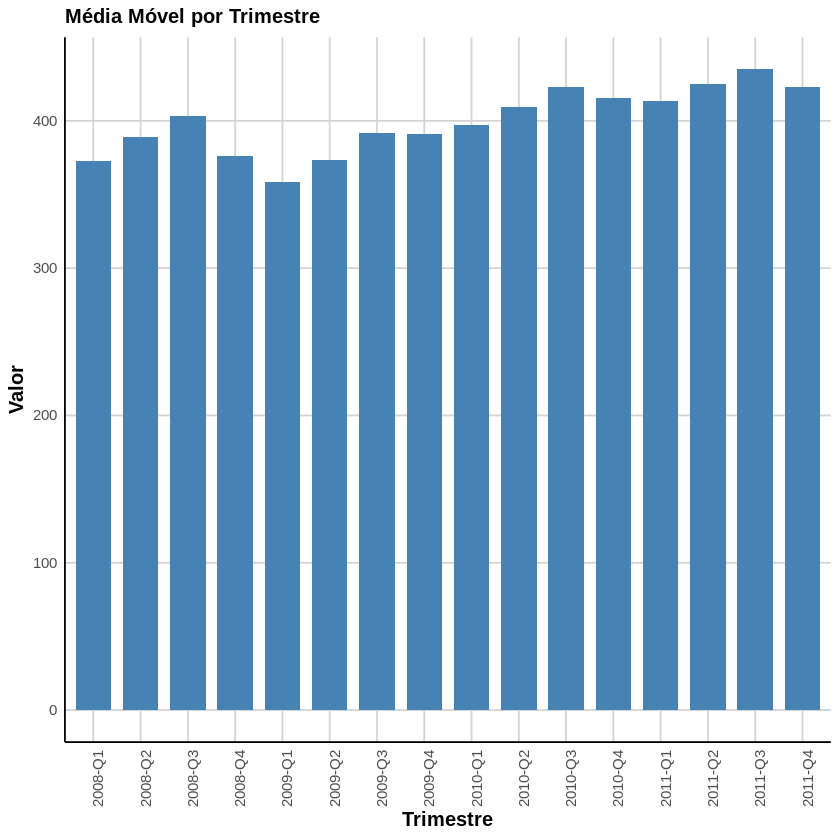

In [62]:
# Criando o gráfico de barras com média móvel por trimestre
ggplot(df, aes(x = trimestre_ano, y = valor)) +  # Define os dados e mapeamento estético
  geom_bar(stat = "identity", fill = "steelblue", width = 0.75) +  # Adiciona barras com altura proporcional aos valores
  labs(x = "Trimestre", y = "Valor", title = "Média Móvel por Trimestre") +  # Define os rótulos dos eixos e o título do gráfico
  theme_minimal() +  # Aplica um tema minimalista ao gráfico
  theme(
    plot.title = element_text(face = "bold", size = 12),  # Configura o estilo do título do gráfico
    axis.title = element_text(face = "bold", size = 12),  # Configura o estilo dos rótulos dos eixos
    axis.text = element_text(size = 9),  # Configura o tamanho dos textos dos eixos
    panel.grid.major = element_line(color = "lightgray"),  # Adiciona linhas de grade principais
    panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
    axis.line = element_line(color = "black"),  # Configura a cor das linhas dos eixos
    legend.position = "none",  # Remove a legenda do gráfico
    axis.text.x = element_text(angle = 90, hjust = 1)  # Rotaciona o texto do eixo x em 90 graus
  )




In [63]:
# Calcular as médias do valor por semestre
media_por_semestre <- df %>%
  group_by(semestre_ano) %>%
  summarize(media_valor = mean(valor))

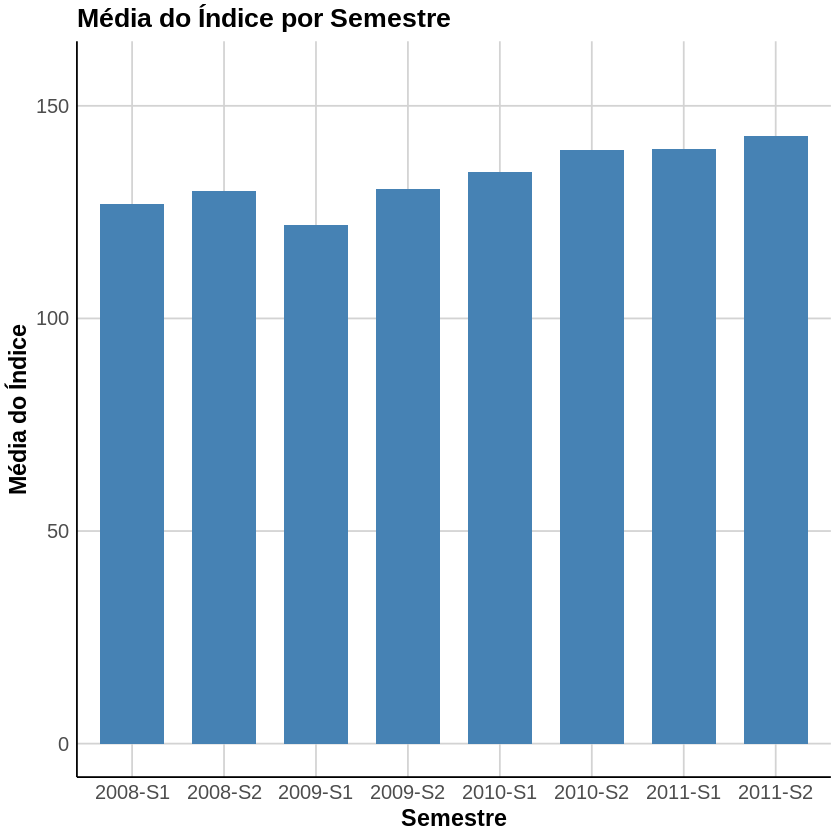

In [66]:
# Criar o gráfico de barras
ggplot(media_por_semestre, aes(x = semestre_ano, y = media_valor)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.7) +  # Definir cor e largura das barras
  labs(x = "Semestre", y = "Média do Índice", title = "Média do Índice por Semestre") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Configurar título
    axis.title = element_text(face = "bold", size = 14),  # Configurar rótulos dos eixos
    axis.text = element_text(size = 12),  # Configurar tamanho dos textos dos eixos
    panel.grid.major = element_line(color = "lightgray"),  # Adicionar linhas de grade leves
    panel.grid.minor = element_blank(),  # Remover linhas de grade menores
    axis.line = element_line(color = "black"),  # Cor das linhas dos eixos
    axis.ticks = element_blank(),  # Remover ticks dos eixos
    legend.position = "none"  # Remover legenda
  ) +
  coord_cartesian(ylim = c(0, max(media_por_semestre$media_valor) * 1.1))  # Ajustar limite do eixo y


In [88]:
# Agrupar os dados por semestre e calcular a média da taxa de crescimento
media_por_semestre <- df %>%
  group_by(semestre_ano) %>%
  summarise(media_taxa_crescimento = mean(as.numeric(gsub("%", "", taxa_crescimento)), na.rm = TRUE))



In [89]:
# Ordenar os semestres
media_por_semestre$semestre_ano <- factor(media_por_semestre$semestre_ano, levels = unique(media_por_semestre$semestre_ano))

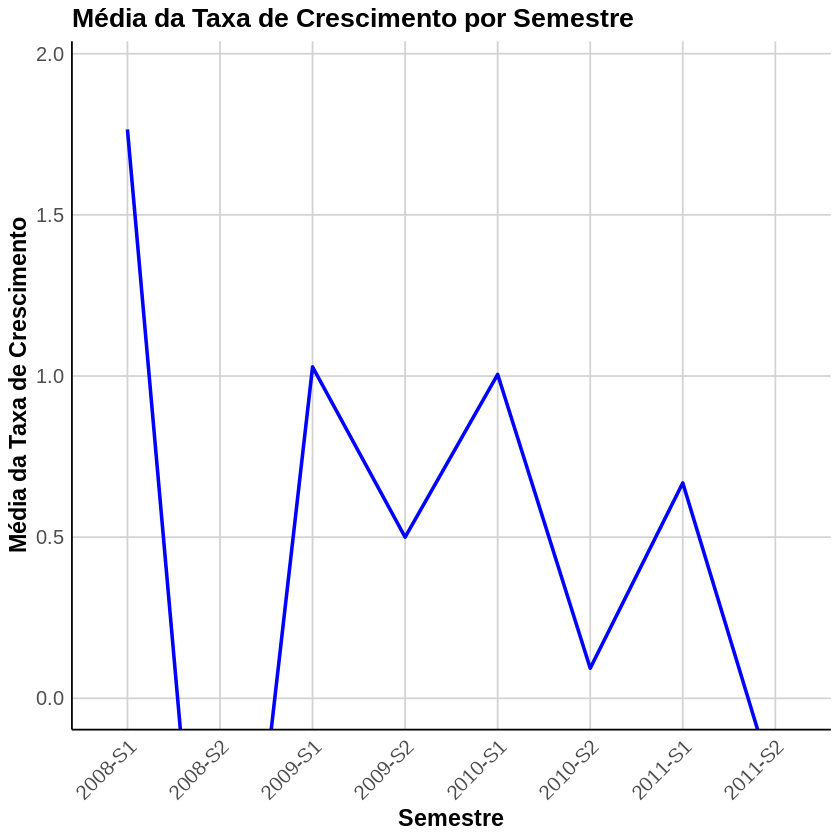

In [90]:
# Gráfico de linha da média da taxa de crescimento por semestre
ggplot(media_por_semestre, aes(x = semestre_ano, y = media_taxa_crescimento)) +
  geom_line(aes(group = 1), color = "blue", size = 1) +  # Linha azul com tamanho 1
  labs(x = "Semestre", y = "Média da Taxa de Crescimento", title = "Média da Taxa de Crescimento por Semestre") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Configurar título
    axis.title = element_text(face = "bold", size = 14),  # Configurar rótulos dos eixos
    axis.text = element_text(size = 12),  # Configurar tamanho dos textos dos eixos
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotacionar rótulos do eixo x
    panel.grid.major = element_line(color = "lightgray"),  # Adicionar linhas de grade leves
    panel.grid.minor = element_blank(),  # Remover linhas de grade menores
    axis.line = element_line(color = "black"),  # Cor das linhas dos eixos
    axis.ticks = element_blank(),  # Remover ticks dos eixos
    legend.position = "none"  # Remover legenda
  ) +
  coord_cartesian(ylim = c(0, max(media_por_semestre$media_taxa_crescimento) * 1.1))  # Ajustar limite do eixo y



In [85]:
df <- df %>%
  arrange(df) %>%  # Ordenando os dados por uma coluna específica
  mutate(YoY = (valor / lag(valor, 12) - 1) * 100)  # Criando uma nova coluna "YoY" com a variação Year-over-Year

df <- df %>%
  arrange(data) %>%  # Ordenando os dados por uma coluna específica
  mutate(MoM = valor - lag(valor))  # Criando uma nova coluna "MoM" com a variação Month-over-Month

df <- df[-1, ]  # Removendo a primeira linha do dataframe


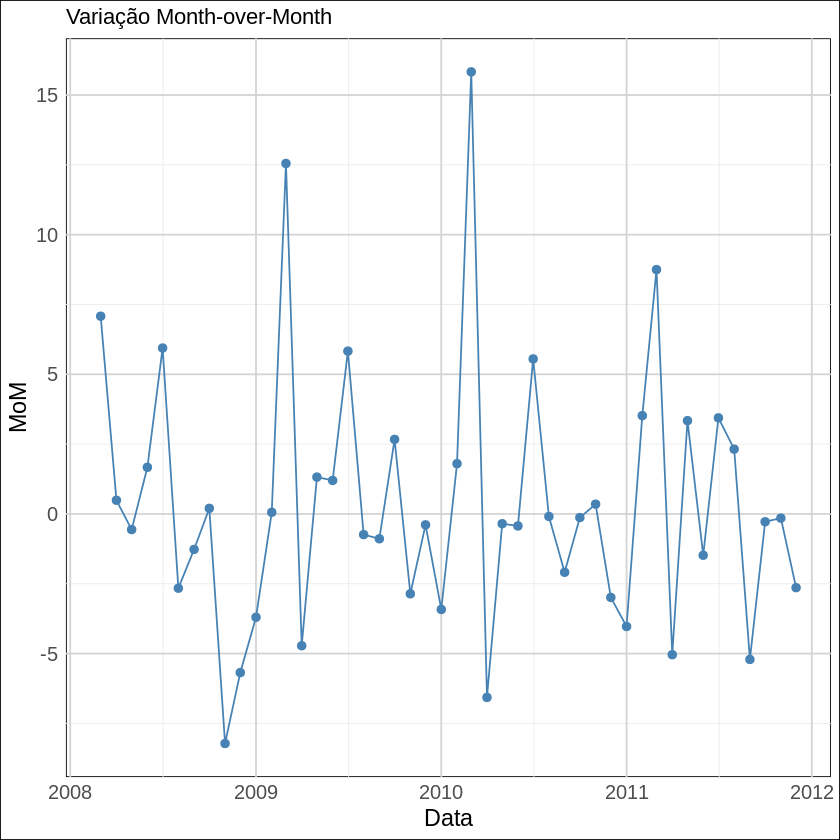

In [86]:
# Gráfico de linhas com variação Mês sobre Mês
ggplot(df, aes(x = data, y = MoM)) +
  geom_line(color = "steelblue") +  # Linha de tendência
  geom_point(color = "steelblue", size = 2) +  # Pontos de dados
  labs(x = "Data", y = "MoM", title = "Variação Month-over-Month") +  # Rótulos dos eixos e título do gráfico
  theme_minimal() +  # Estilo minimalista do tema
  theme(
    axis.text = element_text(size = 12),  # Configuração do tamanho dos textos dos eixos
    axis.title = element_text(size = 14),  # Configuração dos rótulos dos eixos
    panel.grid.major = element_line(color = "lightgray"),  # Linhas de grade principais em cinza claro
    plot.background = element_rect(fill = "white"),  # Fundo do gráfico branco
    panel.background = element_rect(fill = "white")  # Fundo do painel branco
  )



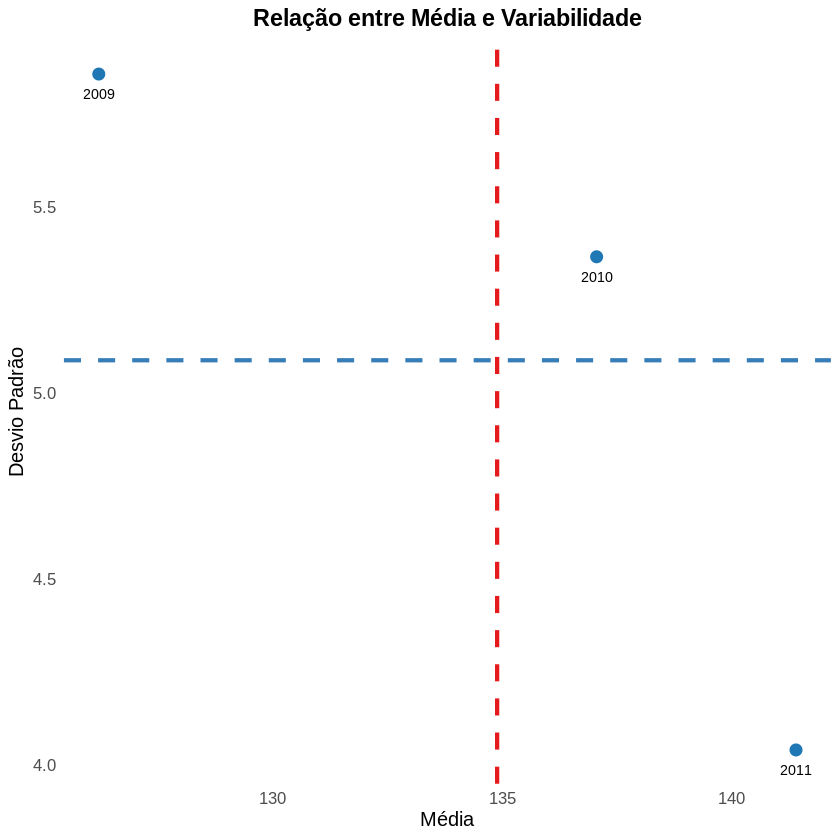

In [83]:
#Gráfico de dispersão para exibir a relação entre a média e variabilidade dos anos
ggplot(df_estatisticas, aes(x = Media, y = DesvioPadrao)) +
  geom_point(size = 3, color = "#1f78b4") +  # Pontos representando os dados
  geom_text(aes(label = Ano), hjust = 0.5, vjust = 2.5, size = 3, color = "black") +  # Rótulos dos anos
  geom_vline(aes(xintercept = mean(Media)), linetype = "dashed", color = "#e41a1c", size = 1.2) +  # Linha vertical na média da média
  geom_hline(aes(yintercept = mean(DesvioPadrao)), linetype = "dashed", color = "#377eb8", size = 1.2) +  # Linha horizontal na média do desvio padrão
  labs(x = "Média", y = "Desvio Padrão") +  # Rótulos dos eixos
  ggtitle("Relação entre Média e Variabilidade") +  # Título do gráfico
  theme_minimal() +  # Estilo minimalista do tema
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),  # Configuração do título
    axis.title = element_text(size = 12),  # Configuração dos rótulos dos eixos
    axis.text = element_text(size = 10),  # Configuração do tamanho dos textos dos eixos
    panel.grid.major = element_blank(),  # Remoção das linhas de grade principais
    panel.grid.minor = element_blank(),  # Remoção das linhas de grade secundárias
    panel.border = element_blank(),  # Remoção das bordas do painel
    legend.position = "none"  # Remoção da legenda
  )

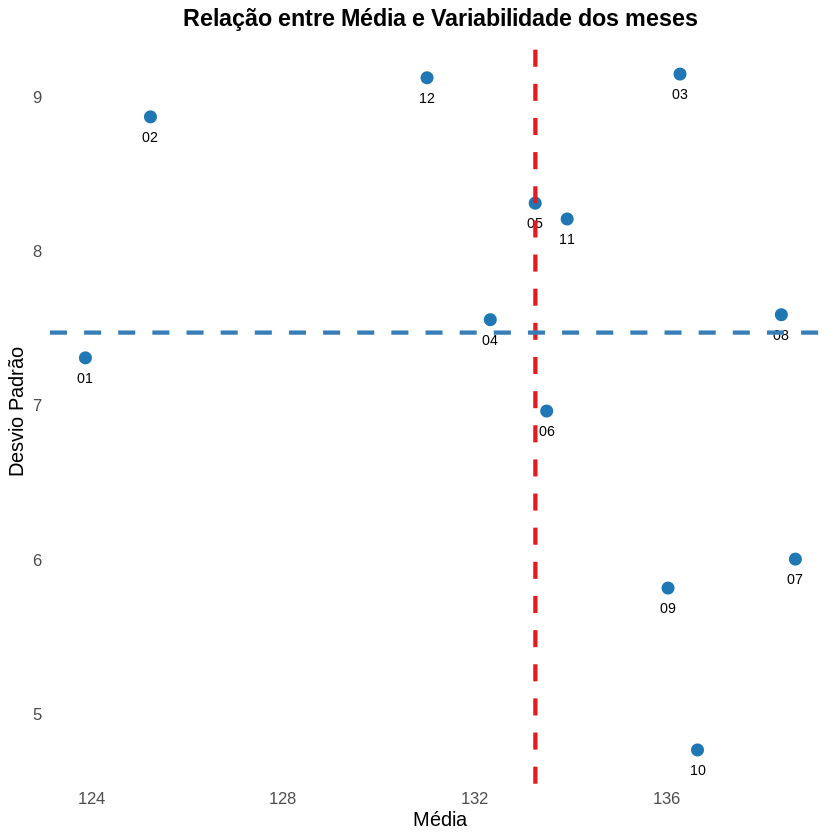

In [82]:
#Gráfico de dispersão para exibir a relação entre a média e variabilidade dos meses
ggplot(df_estatisticas_mes, aes(x = Media, y = DesvioPadrao)) +
  geom_point(size = 3, color = "#1f78b4") +  # Pontos representando os dados
  geom_text(aes(label = Mes), hjust = 0.5, vjust = 2.5, size = 3, color = "black") +  # Rótulos dos meses
  geom_vline(aes(xintercept = mean(Media)), linetype = "dashed", color = "#e41a1c", size = 1.2) +  # Linha vertical na média da média
  geom_hline(aes(yintercept = mean(DesvioPadrao)), linetype = "dashed", color = "#377eb8", size = 1.2) +  # Linha horizontal na média do desvio padrão
  labs(x = "Média", y = "Desvio Padrão") +  # Rótulos dos eixos
  ggtitle("Relação entre Média e Variabilidade dos meses") +  # Título do gráfico
  theme_minimal() +  # Estilo minimalista do tema
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),  # Configuração do título
    axis.title = element_text(size = 12),  # Configuração dos rótulos dos eixos
    axis.text = element_text(size = 10),  # Configuração do tamanho dos textos dos eixos
    panel.grid.major = element_blank(),  # Remoção das linhas de grade principais
    panel.grid.minor = element_blank(),  # Remoção das linhas de grade secundárias
    panel.border = element_blank(),  # Remoção das bordas do painel
    legend.position = "none"  # Remoção da legenda
  )
